# Lesson 2: Embeddings

### Setup
Load needed API keys and relevant Python libaries.

In [ ]:
# !pip install cohere umap-learn altair datasets

In [1]:
import os
from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv()) # read local .env file

In [2]:
import cohere
co = cohere.Client(os.environ['COHERE_API_KEY'])

In [3]:
import pandas as pd

## Word Embeddings

Consider a very small dataset of three words.

In [4]:
three_words = pd.DataFrame({'text':
  [
      'joy',
      'happiness',
      'potato'
  ]})

three_words

,text
0,joy
1,happiness
2,potato


Let's create the embeddings for the three words:

In [5]:
three_words_emb = co.embed(texts=list(three_words['text']),
                           model='embed-english-v2.0').embeddings

In [6]:
word_1 = three_words_emb[0]
word_2 = three_words_emb[1]
word_3 = three_words_emb[2]

In [7]:
word_1[:10]

[2.3203125,
 -0.18334961,
 -0.578125,
 -0.7314453,
 -2.2050781,
 -2.59375,
 0.35205078,
 -1.6220703,
 0.27954102,
 0.3083496]

## Sentence Embeddings

Consider a very small dataset of three sentences.

In [8]:
sentences = pd.DataFrame({'text':
  [
   'Where is the world cup?',
   'The world cup is in Qatar',
   'What color is the sky?',
   'The sky is blue',
   'Where does the bear live?',
   'The bear lives in the the woods',
   'What is an apple?',
   'An apple is a fruit',
  ]})

sentences

,text
0,Where is the world cup?
1,The world cup is in Qatar
2,What color is the sky?
3,The sky is blue
4,Where does the bear live?
5,The bear lives in the the woods
6,What is an apple?
7,An apple is a fruit


Let's create the embeddings for the three sentences:

In [9]:
emb = co.embed(texts=list(sentences['text']),
               model='embed-english-v2.0').embeddings

# Explore the 10 first entries of the embeddings of the 3 sentences:
for e in emb:
    print(e[:3])

[0.27319336, -0.37768555, -1.0273438]
[0.49804688, 1.2236328, 0.4074707]
[-0.23571777, -0.9375, 0.9614258]
[0.08300781, -0.32080078, 0.9272461]
[0.49780273, -0.35058594, -1.6171875]
[1.2294922, -1.3779297, -1.8378906]
[0.15686035, -0.92041016, 1.5996094]
[1.0761719, -0.7211914, 0.9296875]


In [10]:
len(emb[0])

4096

In [11]:
#import umap
#import altair as alt

In [18]:
# from utils import umap_plot
import umap
%matplotlib inline
import umap
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='white', rc={'figure.figsize':(12,8)})

In [19]:
fit = umap.UMAP()

In [20]:
%time u = fit.fit_transform(emb)

/Users/linghuang/miniconda3/envs/transformers/lib/python3.11/site-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


CPU times: user 635 ms, sys: 112 ms, total: 747 ms
Wall time: 715 ms


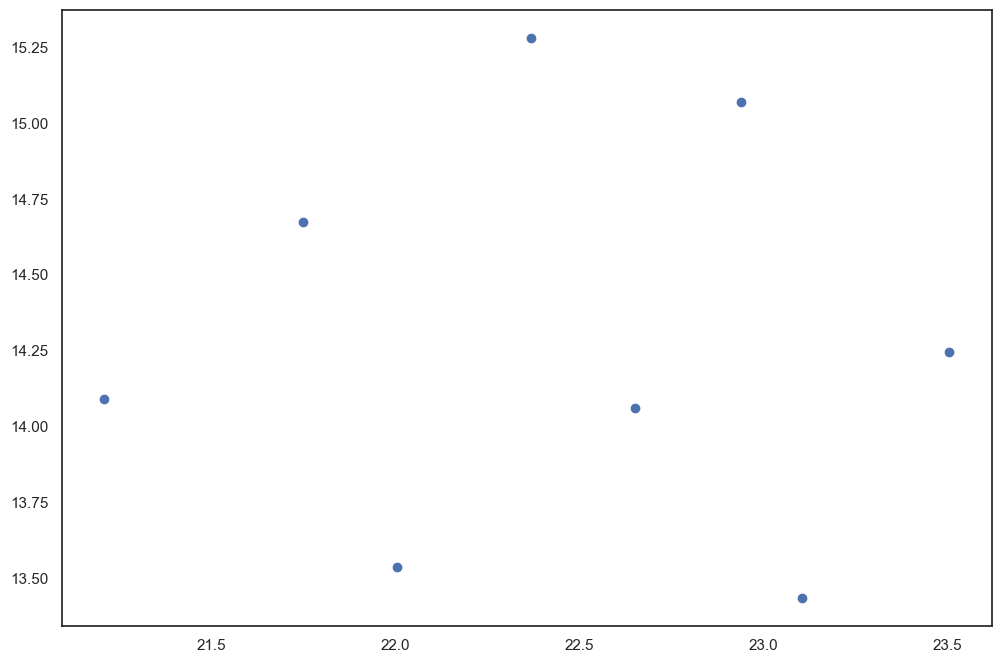

In [22]:
plt.scatter(u[:,0], u[:,1])

In [ ]:
# from utils import umap_plot
# chart = umap_plot(sentences, emb)
# chart.interactive()

## Articles Embeddings

In [24]:
# import pandas as pd
# wiki_articles = pd.read_pickle('wikipedia.pkl')
# wiki_articles

from datasets import load_dataset
docs = load_dataset(f"Cohere/wikipedia-22-12-simple-embeddings", split="train")

Generating train split:   0%|          | 0/485859 [00:00<?, ? examples/s]

In [ ]:
# import numpy as np
# from utils import umap_plot_big

# articles = wiki_articles[['title', 'text']]
# embeds = np.array([d for d in wiki_articles['emb']])

# chart = umap_plot_big(articles, embeds)
# chart.interactive()

In [31]:
from datasets import load_dataset
import torch
import cohere

In [32]:
#Load at max 1000 documents + embeddings
max_docs = 1000
docs_stream = load_dataset(f"Cohere/wikipedia-22-12-simple-embeddings", split="train", streaming=True)

In [33]:
docs = []
doc_embeddings = []

for doc in docs_stream:
    docs.append(doc)
    doc_embeddings.append(doc['emb'])
    if len(docs) >= max_docs:
        break

In [34]:
doc_embeddings = torch.tensor(doc_embeddings)

In [35]:
query = 'Who founded Youtube'
response = co.embed(texts=[query], model='multilingual-22-12')
query_embedding = response.embeddings 
query_embedding = torch.tensor(query_embedding)

In [36]:
# Compute dot score between query embedding and document embeddings
dot_scores = torch.mm(query_embedding, doc_embeddings.transpose(0, 1))
top_k = torch.topk(dot_scores, k=3)

In [37]:
# Print results
print("Query:", query)
for doc_id in top_k.indices[0].tolist():
    print(docs[doc_id]['title'])
    print(docs[doc_id]['text'], "\n")

Query: Who founded Youtube
Wikipedia
Wikipedia began as a related project for Nupedia. Nupedia was a free English-language online encyclopedia project. Nupedia's articles were written and owned by Bomis, Inc which was a web portal company. The important people of the company were Jimmy Wales, the person in charge of Bomis, and Larry Sanger, the editor-in-chief of Nupedia. Nupedia was first licensed under the Nupedia Open Content License which was changed to the GNU Free Documentation License before Wikipedia was founded and made their first article when Richard Stallman requested them. 

Wikipedia
Wikipedia was started on January 10, 2001, by Jimmy Wales and Larry Sanger as part of an earlier online encyclopedia named Nupedia. On January 15, 2001, Wikipedia became a separate website of its own. It is a wiki that uses the software MediaWiki (like all other Wikimedia Foundation projects). 

Wikipedia
Larry Sanger and Jimmy Wales are the ones who started Wikipedia. Wales is credited with 